# 十分钟入门pandas

In [58]:
#coding:utf8
%matplotlib inline

这个一篇针对pandas新手的简短入门，想要了解更多复杂的内容，参阅[*Cookbook*](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

通常，我们首先要导入以下几个库：

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 创建对象

通过传递一个list来创建**Series**，pandas会默认创建整型索引：

In [60]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

通过传递一个numpy array，日期索引以及列标签来创建一个**DataFrame**：

In [61]:
dates = pd.date_range('20130301', periods=6)
dates

DatetimeIndex(['2013-03-01', '2013-03-02', '2013-03-03', '2013-03-04',
               '2013-03-05', '2013-03-06'],
              dtype='datetime64[ns]', freq='D')

In [62]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-03-01,0.592860,-0.593511,0.182378,-0.317323
2013-03-02,0.105822,-0.690571,0.687470,0.958762
2013-03-03,-0.078514,-0.681128,-0.949500,0.273663
2013-03-04,-0.264810,-1.399601,0.148482,-0.839507
2013-03-05,-1.325909,-0.485291,1.076491,-1.077063
2013-03-06,-0.454194,1.017706,2.375410,-0.728094


通过传递一个能够被转换为类似series的dict对象来创建一个**DataFrame**:

In [82]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3]*4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


可以看到各列的数据类型为：

In [64]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# 查看数据

查看frame中头部和尾部的几行：

In [65]:
df.head()

,A,B,C,D
2013-03-01,0.592860,-0.593511,0.182378,-0.317323
2013-03-02,0.105822,-0.690571,0.687470,0.958762
2013-03-03,-0.078514,-0.681128,-0.949500,0.273663
2013-03-04,-0.264810,-1.399601,0.148482,-0.839507
2013-03-05,-1.325909,-0.485291,1.076491,-1.077063


In [66]:
df.tail(3)

,A,B,C,D
2013-03-04,-0.264810,-1.399601,0.148482,-0.839507
2013-03-05,-1.325909,-0.485291,1.076491,-1.077063
2013-03-06,-0.454194,1.017706,2.375410,-0.728094


显示索引、列名以及底层的numpy数据

In [67]:
df.index

DatetimeIndex(['2013-03-01', '2013-03-02', '2013-03-03', '2013-03-04',
               '2013-03-05', '2013-03-06'],
              dtype='datetime64[ns]', freq='D')

In [68]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [69]:
df.values

array([[ 0.59286008, -0.59351082,  0.18237788, -0.31732315],
       [ 0.10582177, -0.69057136,  0.68747009,  0.95876193],
       [-0.07851416, -0.68112808, -0.94949954,  0.27366292],
       [-0.26481008, -1.39960089,  0.14848208, -0.83950711],
       [-1.32590942, -0.48529071,  1.07649138, -1.07706266],
       [-0.45419358,  1.01770601,  2.37541024, -0.72809373]])

describe()能对数据做一个快速统计汇总

In [70]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.237458,-0.472066,0.586789,-0.288260
std,0.642648,0.798263,1.110401,0.773460
min,-1.325909,-1.399601,-0.949500,-1.077063
25%,-0.406848,-0.688211,0.156956,-0.811654
50%,-0.171662,-0.637319,0.434924,-0.522708
75%,0.059738,-0.512346,0.979236,0.125916
max,0.592860,1.017706,2.375410,0.958762


对数据做转置：

In [71]:
df.T

,2013-03-01,2013-03-02,2013-03-03,2013-03-04,2013-03-05,2013-03-06
A,0.592860,0.105822,-0.078514,-0.264810,-1.325909,-0.454194
B,-0.593511,-0.690571,-0.681128,-1.399601,-0.485291,1.017706
C,0.182378,0.687470,-0.949500,0.148482,1.076491,2.375410
D,-0.317323,0.958762,0.273663,-0.839507,-1.077063,-0.728094


按轴进行排序：

In [72]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-03-01,-0.317323,0.182378,-0.593511,0.592860
2013-03-02,0.958762,0.687470,-0.690571,0.105822
2013-03-03,0.273663,-0.949500,-0.681128,-0.078514
2013-03-04,-0.839507,0.148482,-1.399601,-0.264810
2013-03-05,-1.077063,1.076491,-0.485291,-1.325909
2013-03-06,-0.728094,2.375410,1.017706,-0.454194


按值进行排序 :

In [73]:
df.sort_values(by='B')

,A,B,C,D
2013-03-04,-0.264810,-1.399601,0.148482,-0.839507
2013-03-02,0.105822,-0.690571,0.687470,0.958762
2013-03-03,-0.078514,-0.681128,-0.949500,0.273663
2013-03-01,0.592860,-0.593511,0.182378,-0.317323
2013-03-05,-1.325909,-0.485291,1.076491,-1.077063
2013-03-06,-0.454194,1.017706,2.375410,-0.728094


# 数据选择

注意：虽然标准的Python/Numpy的表达式能完成选择与赋值等功能，但我们仍推荐使用优化过的pandas数据访问方法：.at，.iat，.loc，.iloc和.ix

## 选取

选择某一列数据，它会返回一个**Series**，等同于**df.A**：

In [74]:
df['A']

2013-03-01    0.592860
2013-03-02    0.105822
2013-03-03   -0.078514
2013-03-04   -0.264810
2013-03-05   -1.325909
2013-03-06   -0.454194
Freq: D, Name: A, dtype: float64

通过使用**[ ]**进行切片选取：

In [75]:
df[0:3]

,A,B,C,D
2013-03-01,0.592860,-0.593511,0.182378,-0.317323
2013-03-02,0.105822,-0.690571,0.687470,0.958762
2013-03-03,-0.078514,-0.681128,-0.949500,0.273663


In [76]:
df['20130102':'20130104']

,A,B,C,D


## 通过标签选取

通过标签进行交叉选取：

In [77]:
df.loc[dates[0]]

A    0.592860
B   -0.593511
C    0.182378
D   -0.317323
Name: 2013-03-01 00:00:00, dtype: float64

使用标签对多个轴进行选取

In [78]:
df.loc[:,['A','B']]

,A,B
2013-03-01,0.592860,-0.593511
2013-03-02,0.105822,-0.690571
2013-03-03,-0.078514,-0.681128
2013-03-04,-0.264810,-1.399601
2013-03-05,-1.325909,-0.485291
2013-03-06,-0.454194,1.017706


In [79]:
df.loc[:,['A','B']][:3]

,A,B
2013-03-01,0.592860,-0.593511
2013-03-02,0.105822,-0.690571
2013-03-03,-0.078514,-0.681128


进行标签切片，包含两个端点

In [80]:
df.loc['20130102':'20130104',['A','B']]

,A,B


对于返回的对象进行降维处理

In [83]:
df.loc['20130302',['A','B']]

A    0.105822
B   -0.690571
Name: 2013-03-02 00:00:00, dtype: float64

获取一个标量

In [ ]:
df.loc[dates[0],'A']

快速获取标量（与上面的方法等价）

In [ ]:
df.at[dates[0],'A']

## 通过位置选取

通过传递整型的位置进行选取

In [ ]:
df.iloc[3]

通过整型的位置切片进行选取，与python/numpy形式相同

In [ ]:
df.iloc[3:5,0:2]

只对行进行切片

In [ ]:
df.iloc[1:3,:]

只对列进行切片

In [ ]:
df.iloc[:,1:3]

只获取某个值

In [ ]:
df.iloc[1,1]

快速获取某个值（与上面的方法等价）

In [ ]:
df.iat[1,1]

## 布尔索引

用某列的值来选取数据

In [ ]:
df[df.A > 0]

用**where**操作来选取数据

In [ ]:
df[df > 0]

用**isin()**方法来过滤数据

In [ ]:
df2 = df.copy()

In [ ]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

In [ ]:
df2[df2['E'].isin(['two', 'four'])]

## 赋值

赋值一个新的列，通过索引来自动对齐数据

In [ ]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))
s1

In [ ]:
df['F'] = s1
df

通过标签赋值

In [ ]:
df.at[dates[0], 'A'] = 0
df

通过位置赋值

In [ ]:
df.iat[0,1] = 0
df

通过传递numpy array赋值

In [ ]:
df.loc[:,'D'] = np.array([5] * len(df))
df

通过**where**操作来赋值

In [ ]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

# 缺失值处理

在pandas中，用**np.nan**来代表缺失值，这些值默认不会参与运算。

reindex()允许你修改、增加、删除指定轴上的索引，并返回一个数据副本。

In [ ]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns)+['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

剔除所有包含缺失值的行数据

In [ ]:
df1.dropna(how='any')

填充缺失值

In [ ]:
df1.fillna(value=5)

获取值是否为**nan**的布尔标记

In [ ]:
pd.isnull(df1)

# 运算

## 统计

运算过程中，通常不包含缺失值。

进行描述性统计

In [ ]:
df.mean()

对其他轴进行同样的运算

In [ ]:
df.mean(1)

对于拥有不同维度的对象进行运算时需要对齐。除此之外，pandas会自动沿着指定维度计算。

In [ ]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

In [ ]:
df.sub(s, axis='index')

## Apply 函数作用

通过apply()对函数作用

In [ ]:
df.apply(np.cumsum)

In [ ]:
df.apply(lambda x:x.max()-x.min())

## 频数统计

In [ ]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

In [ ]:
s.value_counts()

## 字符串方法

对于Series对象，在其str属性中有着一系列的字符串处理方法。就如同下段代码一样，能很方便的对array中各个元素进行运算。值得注意的是，在str属性中的模式匹配默认使用正则表达式。

In [ ]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

# 合并

## Concat 连接

pandas中提供了大量的方法能够轻松对Series，DataFrame和Panel对象进行不同满足逻辑关系的合并操作

通过**concat()**来连接pandas对象

In [ ]:
df = pd.DataFrame(np.random.randn(10,4))
df

In [ ]:
#break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

In [ ]:
pd.concat(pieces)

## Join 合并

类似于SQL中的合并(merge)

In [ ]:
left = pd.DataFrame({'key':['foo', 'foo'], 'lval':[1,2]})
left

In [ ]:
right = pd.DataFrame({'key':['foo', 'foo'], 'lval':[4,5]})
right

In [ ]:
pd.merge(left, right, on='key')

## Append 添加

将若干行添加到dataFrame后面

In [ ]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

In [ ]:
s = df.iloc[3]
s

In [ ]:
df.append(s, ignore_index=True)

# 分组

对于“group by”操作，我们通常是指以下一个或几个步骤：
* **划分** 按照某些标准将数据分为不同的组
* **应用** 对每组数据分别执行一个函数
* **组合** 将结果组合到一个数据结构

In [ ]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 
                          'foo', 'bar', 'foo', 'bar'],
                   'B' : ['one', 'one', 'two', 'three', 
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

分组并对每个分组应用sum函数

In [ ]:
df.groupby('A').sum()

按多个列分组形成层级索引，然后应用函数

In [ ]:
df.groupby(['A','B']).sum()

# 变形

## 堆叠

In [ ]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [ ]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [ ]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [ ]:
df2 = df[:4]
df2

**stack()**方法对DataFrame的列“压缩”一个层级

In [ ]:
stacked = df2.stack()
stacked

对于一个“堆叠过的”DataFrame或者Series（拥有MultiIndex作为索引），**stack()**的逆操作是**unstack()**，默认反堆叠到上一个层级

In [ ]:
stacked.unstack()

In [ ]:
stacked.unstack(1)

In [ ]:
stacked.unstack(0)

## 数据透视表

In [ ]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

 我们可以轻松地从这个数据得到透视表

In [ ]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

# 时间序列

pandas在对频率转换进行重新采样时拥有着简单，强大而且高效的功能（例如把按秒采样的数据转换为按5分钟采样的数据）。这在金融领域很常见，但又不限于此。

In [ ]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

In [ ]:
ts = pd.Series(np.random.randint(0,500,len(rng)), index=rng)
ts

In [ ]:
ts.resample('5Min', how='sum')

时区表示

In [ ]:
rng = pd.date_range('3/6/2012', periods=5, freq='D')
rng

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

In [ ]:
ts_utc = ts.tz_localize('UTC')
ts_utc

时区转换

In [ ]:
ts_utc.tz_convert('US/Eastern')

时间跨度转换

In [ ]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
rng

In [ ]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

In [ ]:
ps = ts.to_period()
ps

In [ ]:
ps.to_timestamp()

日期与时间戳之间的转换使得可以使用一些方便的算术函数。例如，我们把以11月为年底的季度数据转换为当前季度末月底为始的数据

In [ ]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
prng

In [ ]:
ts = pd.Series(np.random.randn(len(prng)), index = prng)
ts

In [ ]:
ts.index = (prng.asfreq('M', 'end') ) .asfreq('H', 'start') +9
ts

# 分类

从版本0.15开始，pandas在**DataFrame**中开始包括分类数据。

In [ ]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'e', 'e']})
df

把raw_grade转换为分类类型

In [ ]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

重命名类别名为更有意义的名称

In [ ]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

对分类重新排序，并添加缺失的分类

In [ ]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

排序是按照分类的顺序进行的，而不是字典序

In [ ]:
df.sort_values(by="grade")

按分类分组时，也会显示空的分类

In [ ]:
df.groupby("grade").size()

# 绘图

<AxesSubplot:>

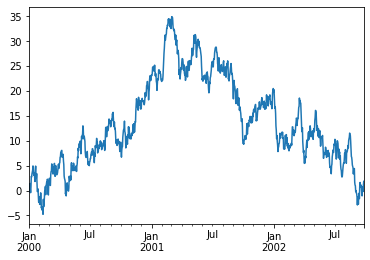

In [84]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

对于DataFrame类型，**plot()**能很方便地画出所有列及其标签

<Figure size 432x288 with 0 Axes>

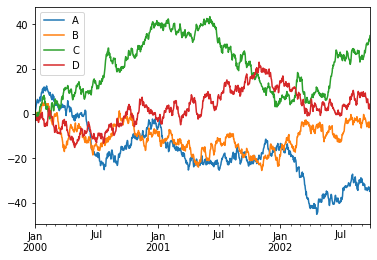

In [85]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

# 获取数据的I/O

## CSV

写入一个csv文件

In [86]:
df.to_csv('data/foo.csv')

从一个csv文件读入

In [89]:
pd.read_csv('data/foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.840058,-2.227311,0.991131,-0.880166
1,2000-01-02,1.582691,-1.455332,-1.394454,-1.393811
2,2000-01-03,2.673898,0.317507,-2.954774,-1.514541
3,2000-01-04,3.836827,-0.348134,-2.888290,-1.764267
4,2000-01-05,4.376382,0.402397,-2.055114,-3.003395
...,...,...,...,...,...
995,2002-09-22,-32.752763,-4.924344,32.356690,2.228646
996,2002-09-23,-32.915756,-6.303128,33.293033,3.148061
997,2002-09-24,-33.086367,-5.454657,32.543417,4.234859
998,2002-09-25,-34.813885,-5.151296,33.707282,2.040071


## HDF5

HDFStores的读写

写入一个HDF5 Store

In [88]:
df.to_hdf('data/foo.h5', 'df')

ImportError: Missing optional dependency 'tables'.  Use pip or conda to install tables.

从一个HDF5 Store读入

In [ ]:
pd.read_hdf('data/foo.h5', 'df')

## Excel

MS Excel的读写

写入一个Excel文件

In [91]:
df.to_excel('data/foo.xlsx', sheet_name='Sheet1')

从一个excel文件读入

In [92]:
pd.read_excel('data/foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.840058,-2.227311,0.991131,-0.880166
1,2000-01-02,1.582691,-1.455332,-1.394454,-1.393811
2,2000-01-03,2.673898,0.317507,-2.954774,-1.514541
3,2000-01-04,3.836827,-0.348134,-2.888290,-1.764267
4,2000-01-05,4.376382,0.402397,-2.055114,-3.003395
...,...,...,...,...,...
995,2002-09-22,-32.752763,-4.924344,32.356690,2.228646
996,2002-09-23,-32.915756,-6.303128,33.293033,3.148061
997,2002-09-24,-33.086367,-5.454657,32.543417,4.234859
998,2002-09-25,-34.813885,-5.151296,33.707282,2.040071
